# Heart Failure Prediction Using ANN

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


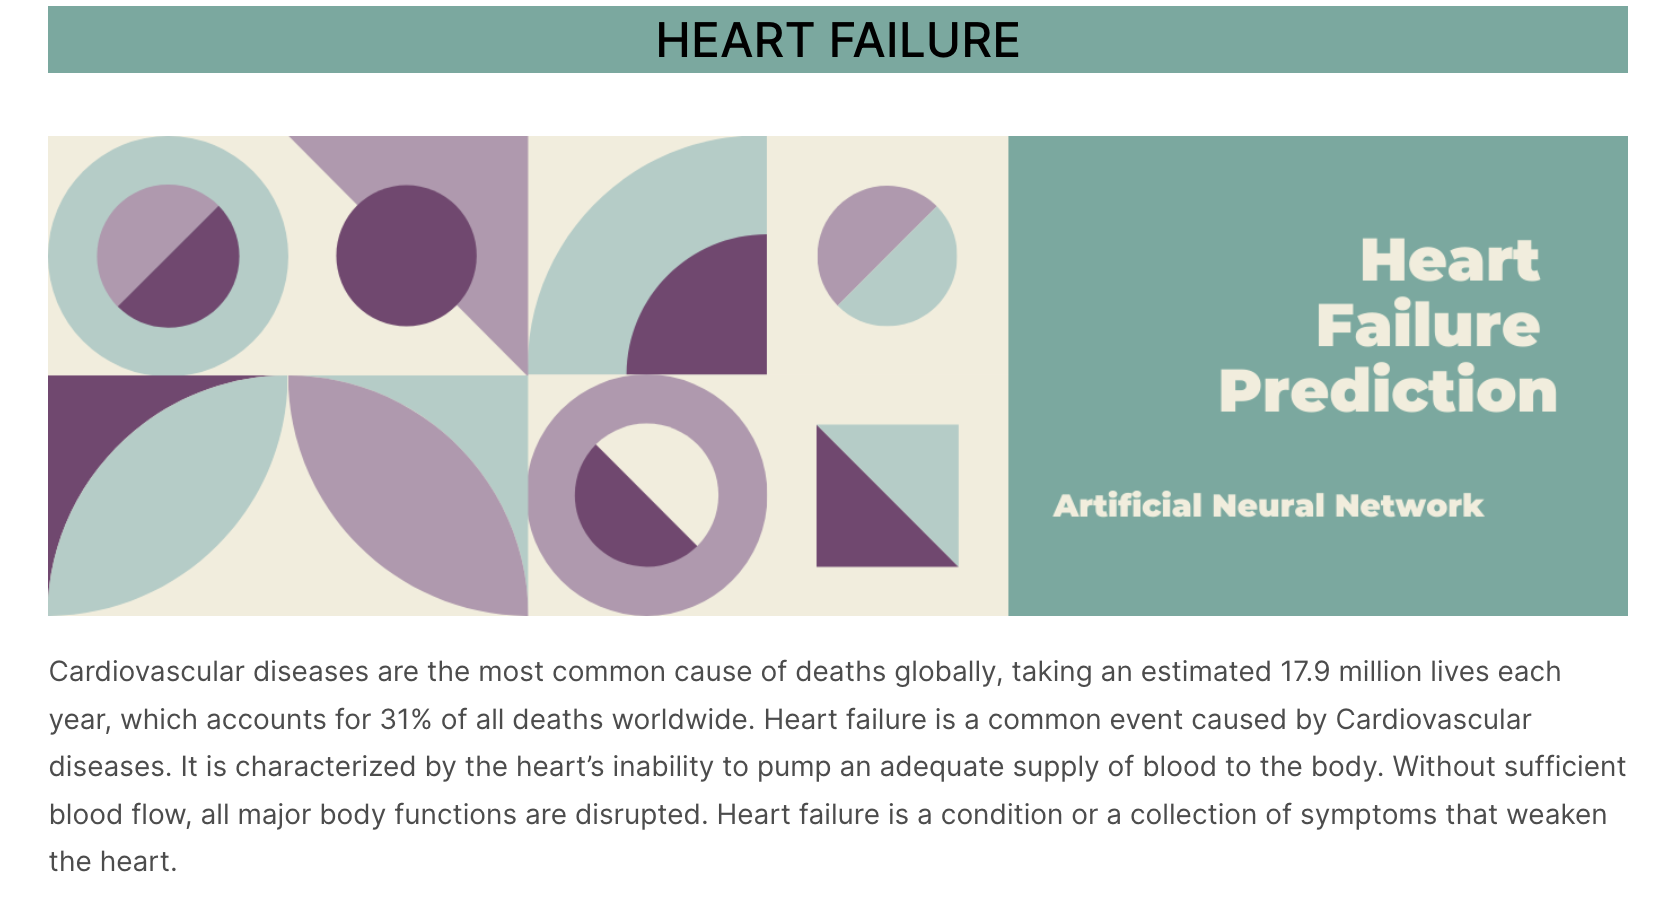

In [46]:
from IPython.display import Image
Image('/content/drive/My Drive/ws.jpg')

# TABLE OF CONTENTS

     1- IMPORTING LIBRARIES

     2- LOADING DATASET

     3- Build ANN model
          
     4- Evaluate The Model
     
     5- Make Predictions

The dataset used to train ANN models to predict whether a patient with heart failure is likely to die during the follow-up period.
This information can be used to help doctors make better decisions about patient care.

# 1.Importing Libraries

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import shutil


# 2.Loading the data

In [3]:
#loading dataset
data_df= pd.read_csv("/content/drive/My Drive/heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [93]:
data_df.shape

(299, 13)

In [94]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [95]:
data_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
# make columns lowercases for ease of use
data_df.columns = data_df.columns.str.lower()

# **`Understanding features:`**

Anemia - anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. (there is not anemia - 0, there is anemia - 1)

Creatine_phosphokinase (CPK) - CPK is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)

Ejection_fraction (EF) - EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.

Platelets - platelets are colorless blood cells that help blood clot. Platelets stop bleeding by clumping and forming plugs in blood vessel injuries. Thrombocytopenia might occur as a result of a bone marrow disorder such as leukemia or an immune system problem. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.

Serum_creatinine - The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L). Here are the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.

Serum_sodium - Measurement of serum sodium is routine in assessing electrolyte, acid-base, and water balance, as well as renal function. Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).
*   Time - follow-up period (days)
*   High_blood_pressure - (True - 1, False - 0)
*   Age - between 40 - 95
*   Diabetes - (True - 1, False - 0)
*   Sex - (male - 1, female - 0)
*   Smoking - (True - 1, False - 0)
*   Death event - (True - 1, False - 0)

# EDA

# Make a copy of the data for the visualisation:

In [54]:
data_d = data_df.copy()
data_d.death_event = data_d.death_event.map({0:'Alive',1:'Dead'})
data_d.diabetes = data_d.diabetes.map({0:'No',1:'Yes'})
data_d.smoking = data_d.smoking.map({0:'No',1:'Yes'})
data_d.sex = data_d.sex.map({0:'Female',1:'Male'})

# Distribution of Death by heart failure:

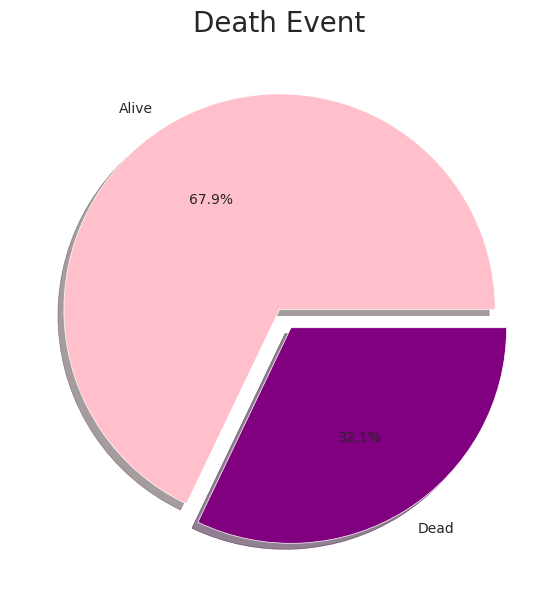

In [55]:
plt.figure(figsize=(7,7))
plt.pie(data_d['death_event'].value_counts(), labels=['Alive', 'Dead'], autopct='%1.1f%%', shadow=True, explode=[0,0.1], colors=['pink', 'purple'])
plt.title('Death Event', fontsize=20)
plt.show()


It clearly show the data is unbalanced

# Sex distribution:

In [56]:
data_d['sex'].value_counts()

,count
sex,
Male,194
Female,105


Based on the dataset, there are more males than females, which introduces a gender imbalance. As a result, heart failure cannot be reliably measured by gender, as the data is biased towards males

# Is there any relation between gender and death event?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='sex', ylabel='count'>

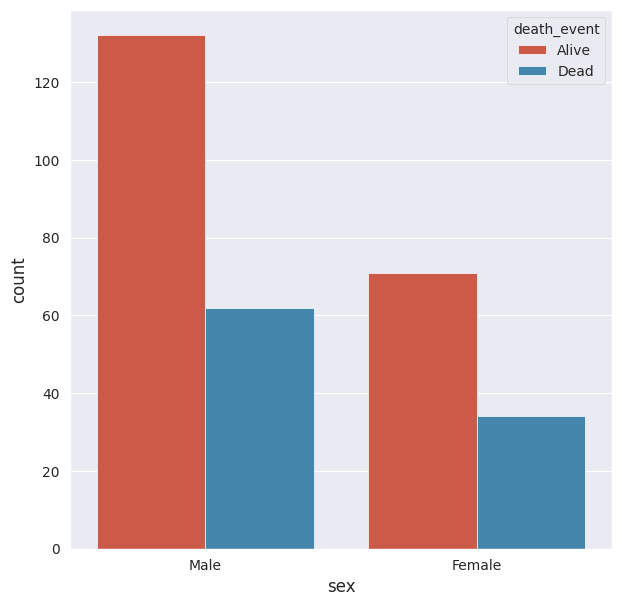

In [57]:
data_d['death_event'] = data_d['death_event'].astype('category')
plt.figure(figsize=(7,7))
sns.countplot(x='sex',hue='death_event',data=data_d)


Since males are overrepresented in the dataset, it is expected that they show a higher likelihood of dying from heart failure.

# Is there a relationship between age and heart failure?

<ipython-input-58-20f38b146e03>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




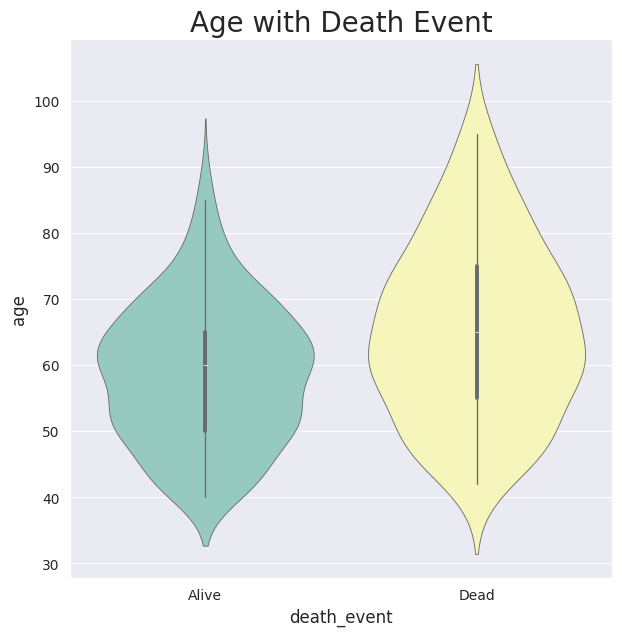

In [58]:
plt.figure(figsize=(7,7))
sns.violinplot(x='death_event',y='age',data=data_d, palette='Set3')
plt.title('Age with Death Event',fontsize=20)
plt.show()

As we can see, the likelihood of dying from heart failure increases with age.

# Can diabetes be a cause of heart failure?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



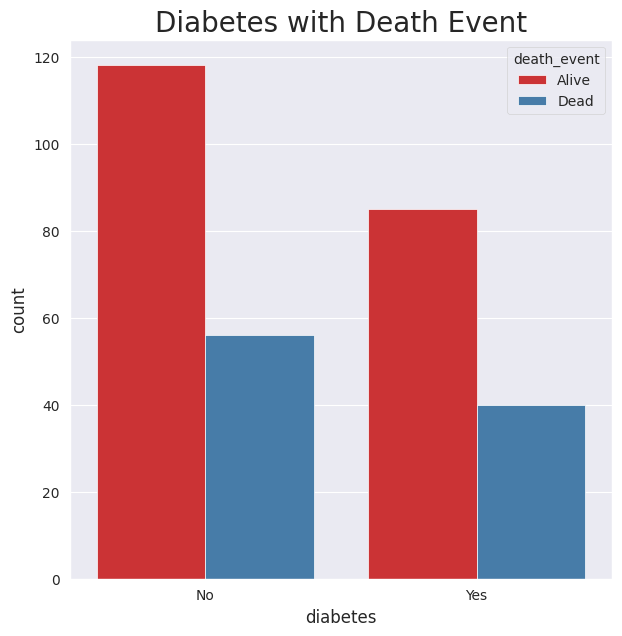

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.countplot(x='diabetes',hue='death_event',data=data_d, palette='Set1')
plt.title('Diabetes with Death Event',fontsize=20)
plt.show()


There appears to be no significant difference in the number of heart failure deaths between individuals with and without diabetes

# Can smoking be a cause of heart failure?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



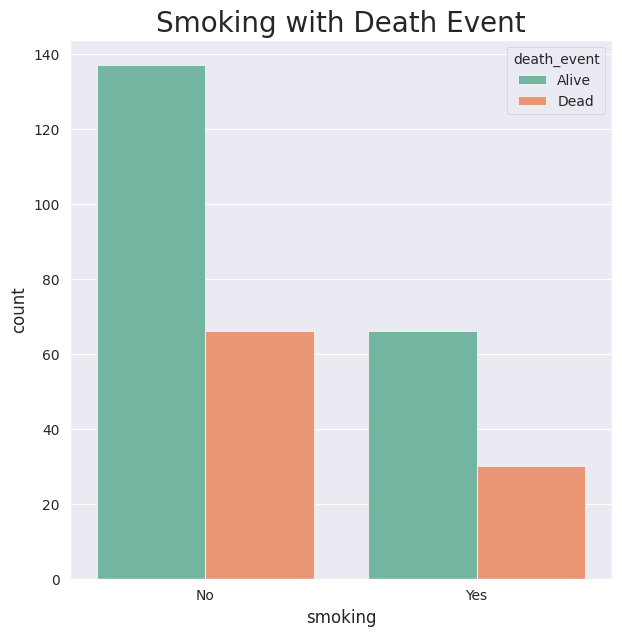

In [60]:
# chart for smoking vs death event
plt.figure(figsize=(7,7))
sns.countplot(x='smoking',hue='death_event',data=data_d, palette='Set2')
plt.title('Smoking with Death Event',fontsize=20)
plt.show()

Data shows that smokers have a higher likelihood of dying from heart failure.

# creatinine_phosphokinase vs death event

In [61]:
import plotly.express as px
fig = px.violin(data_d, y="creatinine_phosphokinase", x="death_event", color="death_event", box=True, points="all", hover_data=data_d.columns)
fig.show()


# Data preprocessing

In [62]:
data_df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


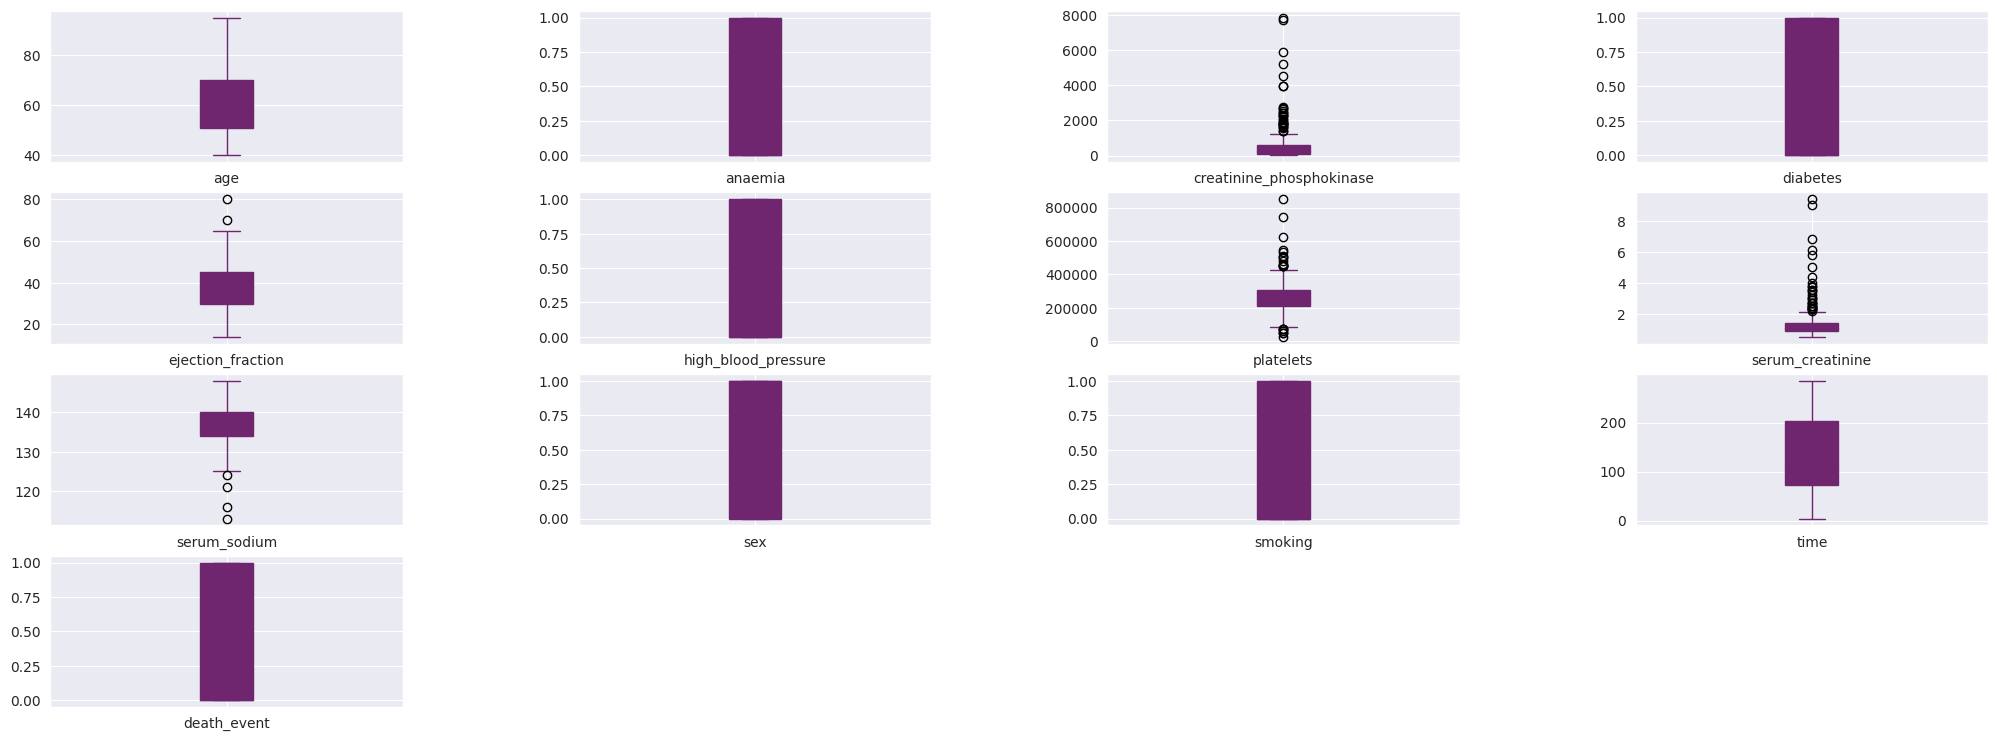

In [63]:
nums = data_df.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

There are outliers in the data.

# Deletion of outliers

In [5]:
data = data_df.drop(data_df[data_df['platelets']>420000].index)
data = data_df.drop(data_df[data_df['serum_creatinine']>2.5].index)
data = data_df.drop(data_df[data_df['creatinine_phosphokinase']>1500].index)

# Correlation heatmap:

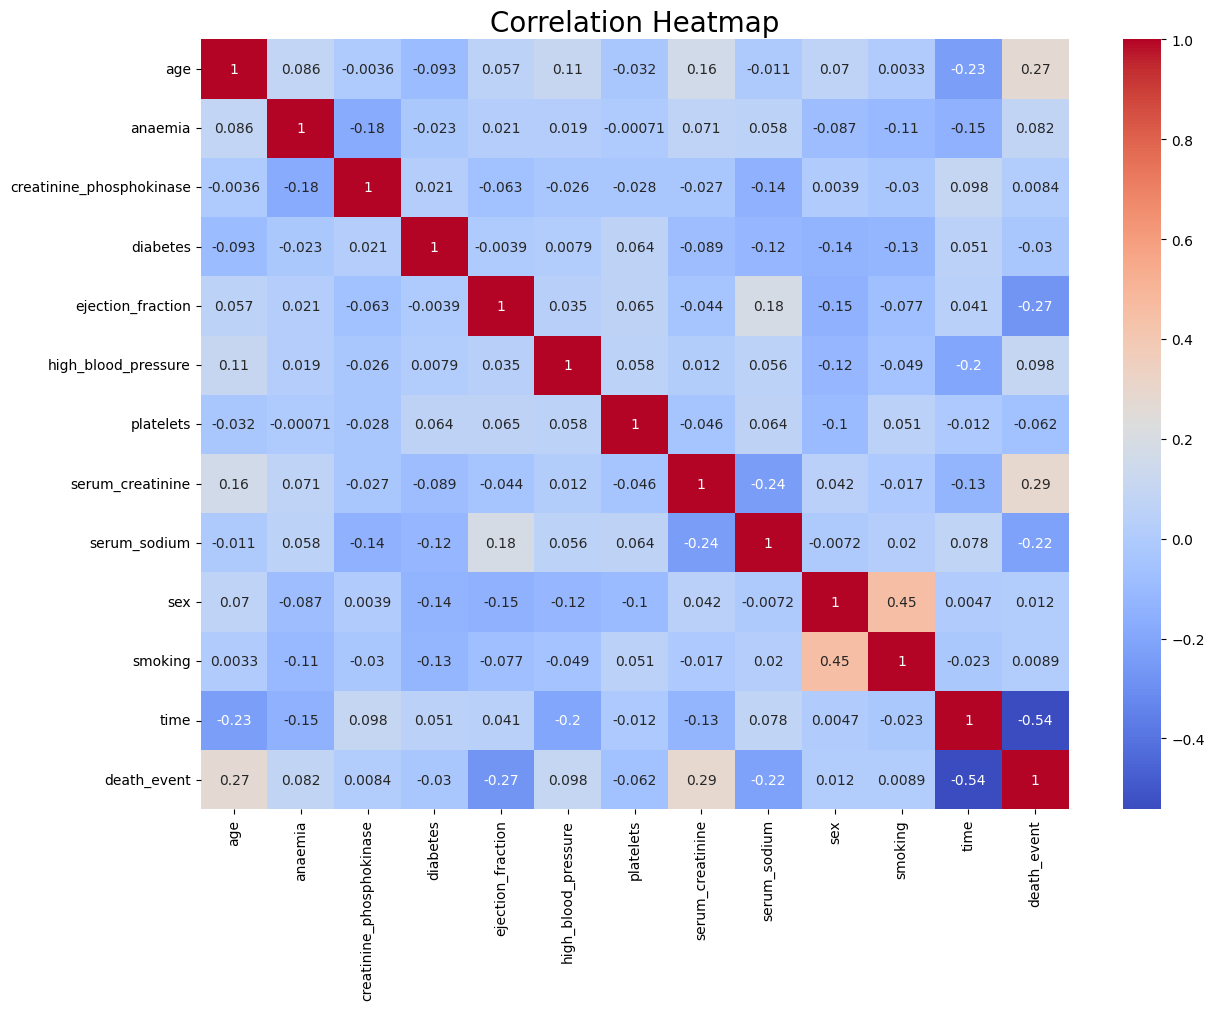

In [6]:
# heatmap for correlation
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=20)
plt.show()


# Importance of features:

[0.09652918 0.02719287 0.06977272 0.02918963 0.12354693 0.02347819
 0.0668426  0.12006807 0.0891134  0.02624231 0.02844378 0.29958032]


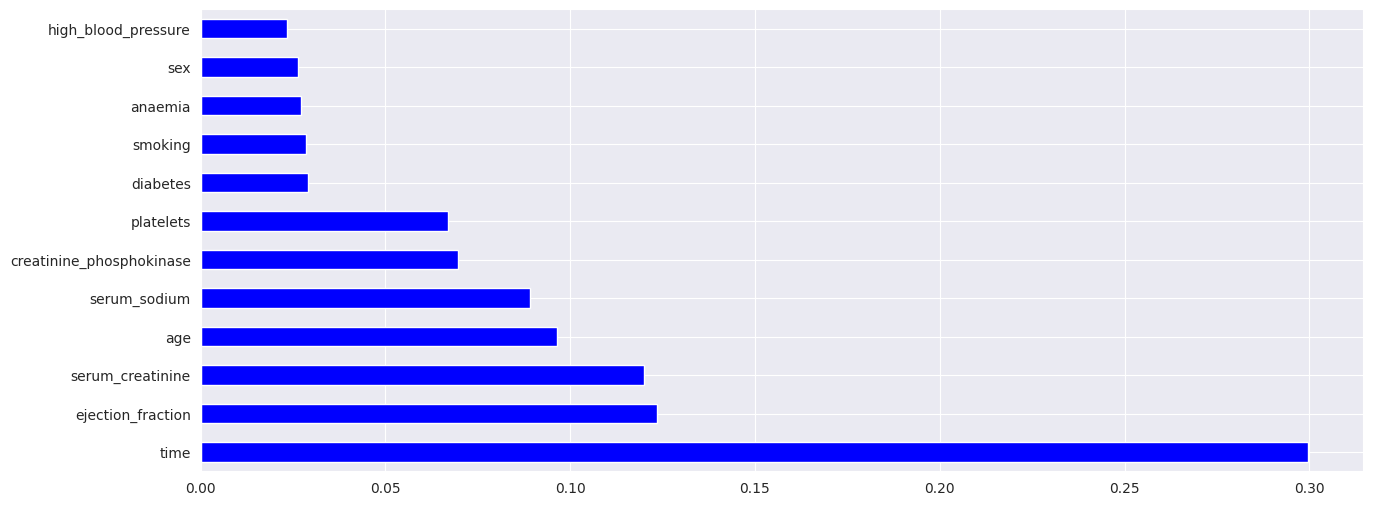

In [7]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
x = data.iloc[:, :-1]
y = data.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh',color='blue')
plt.show()


# VIF

# Check for multicolinearity

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i)
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

,0
age,31.068279
anaemia,1.968976
creatinine_phosphokinase,2.462981
diabetes,1.777558
ejection_fraction,13.076784
high_blood_pressure,1.681635
platelets,8.974035
serum_creatinine,3.211261
serum_sodium,60.845186
sex,3.723108


# Treatment of multicolinearity:

In [9]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>13:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [10]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

serum_sodium has been removed
age has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,sex,smoking,time,death_event
0,0,582,0,20,1,265000.0,1.9,1,0,4,1
2,0,146,0,20,0,162000.0,1.3,1,1,7,1
3,1,111,0,20,0,210000.0,1.9,1,0,7,1
4,1,160,1,20,0,327000.0,2.7,0,0,8,1
5,1,47,0,40,1,204000.0,2.1,1,1,8,1


# Calculating VIF for remaining columns:

In [11]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(anaemia                     1.855843
 creatinine_phosphokinase    2.371651
 diabetes                    1.744334
 ejection_fraction           7.754146
 high_blood_pressure         1.617487
 platelets                   7.147797
 serum_creatinine            3.129901
 sex                         3.291041
 smoking                     1.915365
 time                        4.407291
 death_event                 2.035234
 dtype: float64,
 11)

# Splitting data:

In [12]:
#Defining independent and dependent attributes in training and test sets
X=data_df.drop(["death_event"],axis=1)
y=data_df["death_event"]

In [13]:
X.shape

(299, 12)

In [14]:
y.shape

(299,)

# Use smote to balance the data

In [18]:
# balance the data by oversampling the minority class

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

# Scaling data:

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sm_scaled = scaler.fit_transform(X_sm)

# Split the dataset into train/test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm_scaled, y_sm, test_size=0.2, random_state=42)

# 3. Define ANN Model

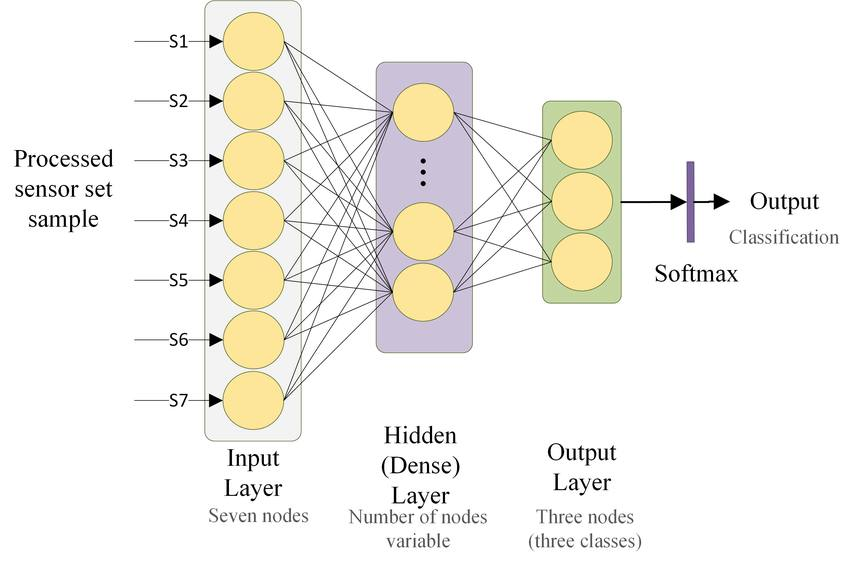

In [78]:
from IPython.display import Image
Image('/content/drive/My Drive/ws1.jpg')

# Build the model with different optmization functions (Adam,SGD,rmsprop)

Trial 3 Complete [00h 01m 47s]
accuracy: 0.9537037014961243

Best accuracy So Far: 0.9537037014961243
Total elapsed time: 00h 12m 02s
Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.5061 - loss: 0.6931 - val_accuracy: 0.6707 - val_loss: 0.6930
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6420 - loss: 0.6930 - val_accuracy: 0.6951 - val_loss: 0.6929
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7322 - loss: 0.6929 - val_accuracy: 0.7683 - val_loss: 0.6928
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7715 - loss: 0.6928 - val_accuracy: 0.7683 - val_loss: 0.6927
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7884 - loss: 0.6927 - val_accuracy: 0.7805 - val_loss: 0.6926
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7963 - loss: 0.6925 - val_accuracy: 0.7805 - val_loss: 0.6924
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8058 - loss: 0.6923 - val_accuracy: 0.7927 - 

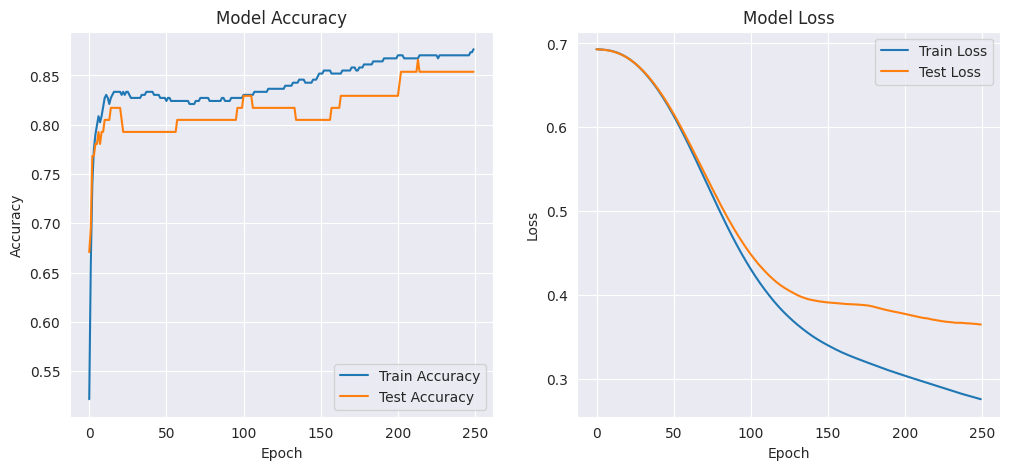

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.87      0.83      0.85        41

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82

Confusion Matrix:
 [[36  5]
 [ 7 34]]


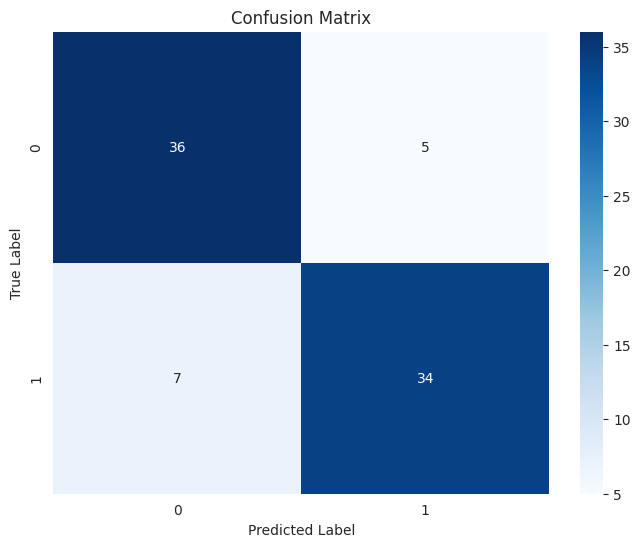

In [22]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#Clear the cache if needed
shutil.rmtree('my_dir', ignore_errors=True)



# Define the hypermodel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # Input layer and first hidden layer
        model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))

        # Second hidden layer
        model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

        # Output layer
        model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

        # Choose optimizer from the list
        optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

        # Compile the model
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        return model

# Instantiate the HyperModel class
hypermodel = MyHyperModel()

# Define the tuner
tuner = RandomSearch(
    hypermodel,
    objective='accuracy',  # Change 'val_accuracy' to 'accuracy'
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir_v3',  # Ensure this is unique to avoid caching
    project_name='ANN_Optimizer_Tuning_v2'
)


tuner.search(X_train, y_train, epochs=250, verbose=1)

# Retrieve the best model and best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model and capture the history for training and test accuracy/loss
history = best_model.fit(X_train, y_train, epochs=250, batch_size=200, validation_data=(X_test, y_test), verbose=1)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Print the best optimizer
print(f"The best optimizer is: {best_hps.get('optimizer')}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# Predict class labels on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Generate and print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


 1.First the graphs indicate that the model is learning effectively on the training data and generalizes well to unseen test data, with a test accuracy around 85% and no signs of significant overfitting.

2.The RMSprop optimizer selected by the tuner has helped the model achieve good performance on both training and test data.

3.The confusion matrix shows that the model performs well, with an overall accuracy of around 85%. It correctly identifies most instances of both classes, but it has a small number of false positives (5) and false negatives (7). .

# 7. Make Predictions

In [23]:
# Make class predictions with the model
predictions = (best_model.predict(X_test) > 0.5).astype(int)

# Display the first 5 predictions along with the expected values
for i in range(5):
    print(f'Input: {X_test[i].tolist()} => Predicted: {predictions[i][0]}, Expected: {y_test.iloc[i]}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Input: [-1.8176081664515087, -0.7735794702875676, -0.47508726703603515, -0.753370803500884, 0.28898889872438616, -0.6515837655350016, 1.1705173900413595, -0.6720231967461731, 0.8697621004034967, 0.8274341683206975, 1.715152346823901, -0.634831256564299] => Predicted: 0, Expected: 0
Input: [0.47566711533063494, 1.292692009559488, 0.45180754638235104, 1.3273676061682242, -0.14016067289997697, -0.6515837655350016, 0.07805144624431799, -0.38815249523520867, -0.5269026831053465, 0.8274341683206975, -0.5830385865440985, 1.060058493718547] => Predicted: 0, Expected: 0
Input: [-1.4778636802615615, 1.292692009559488, -0.5621495519161127, 1.3273676061682242, -0.9984598161487032, -0.6515837655350016, -0.32499424175847397, -0.6720231967461731, -0.29412521918720597, 0.8274341683206975, -0.5830385865440985, 1.4936349414653216] => Predicted: 0, Expected: 0
Input: [-1.0531830725241274, 1.292692009559488, -0.46340818003992723, 1.3273676061682242, -0.569310244524340

# References

1-https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

